In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# path = "/Users/marcosmaldacena/Downloads/Thesis Data/2006_2025_2-19_v8.csv"
path = ("/Users/marcosmaldacena/Downloads/Thesis Data/2016_2020_Cap_Goods_2-20_v9.csv")
df = pd.read_csv(path)


In [40]:
df.columns
import ast

# Convert the whole column safely
# df['tariff_questions_bow'] = df['tariff_questions_bow'].apply(ast.literal_eval)
# df['tariff_questions'] = df['tariff_questions'].apply(ast.literal_eval)
df['questions'] = df['questions'].apply(ast.literal_eval)

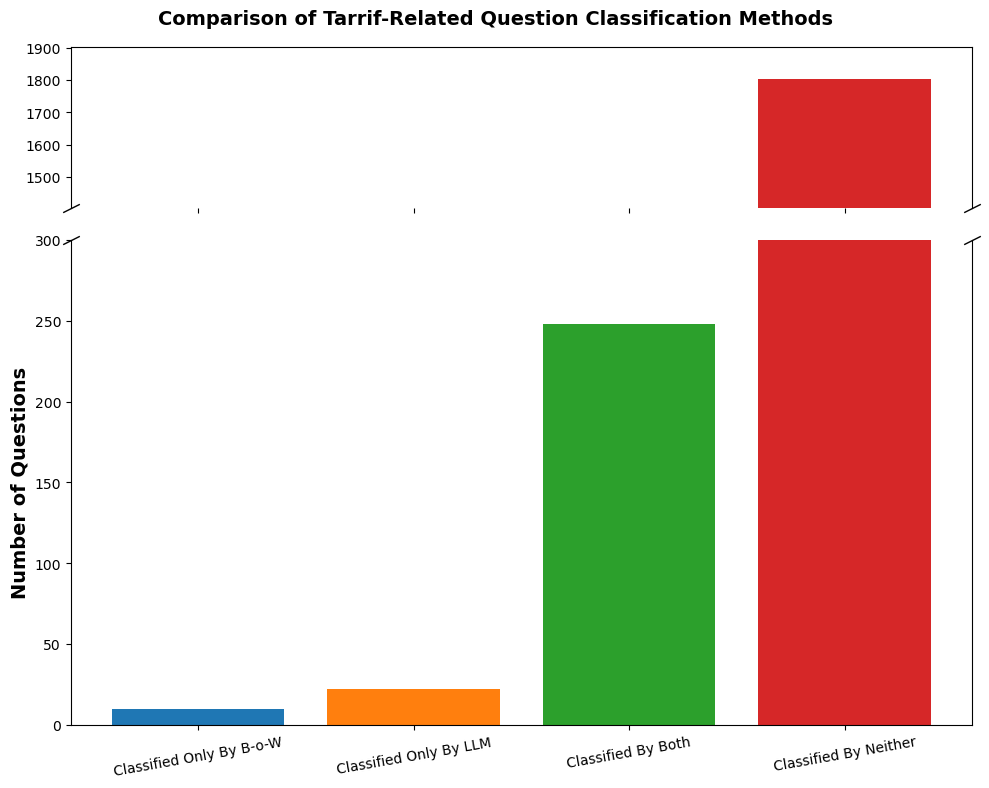

In [76]:
import matplotlib.pyplot as plt

categories = ['Classified Only By B-o-W', 'Classified Only By LLM', 'Classified By Both', 'Classified By Neither']
counts = [total_only_bow, total_only_tariff, total_both, total_neither]

# Create two subplots with a broken y-axis
fig, (ax1, ax2) = plt.subplots(
    2, 1, 
    sharex=True, 
    figsize=(10, 8), 
    gridspec_kw={'height_ratios': [1, 3]}
)

# Set colors manually for each bar
bar_colors = ['C0', 'C1', 'C2', 'C3']

# Top plot (zoomed out to show the big bar)
ax1.bar(categories, counts, color=bar_colors)
ax1.set_ylim(max(counts) - 400, max(counts) + 100)

# Bottom plot (zoomed in to show small bars)
ax2.bar(categories, counts, color=bar_colors)
ax2.set_ylim(0, 300)

# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top

# Add diagonal lines at the break
d = .5  # size of diagonal lines
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle='none', color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# Titles and labels
fig.suptitle('Comparison of Tarrif-Related Question Classification Methods', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Questions', fontsize=14, fontweight='bold')

plt.xticks(rotation=10)

plt.tight_layout()

plt.show()


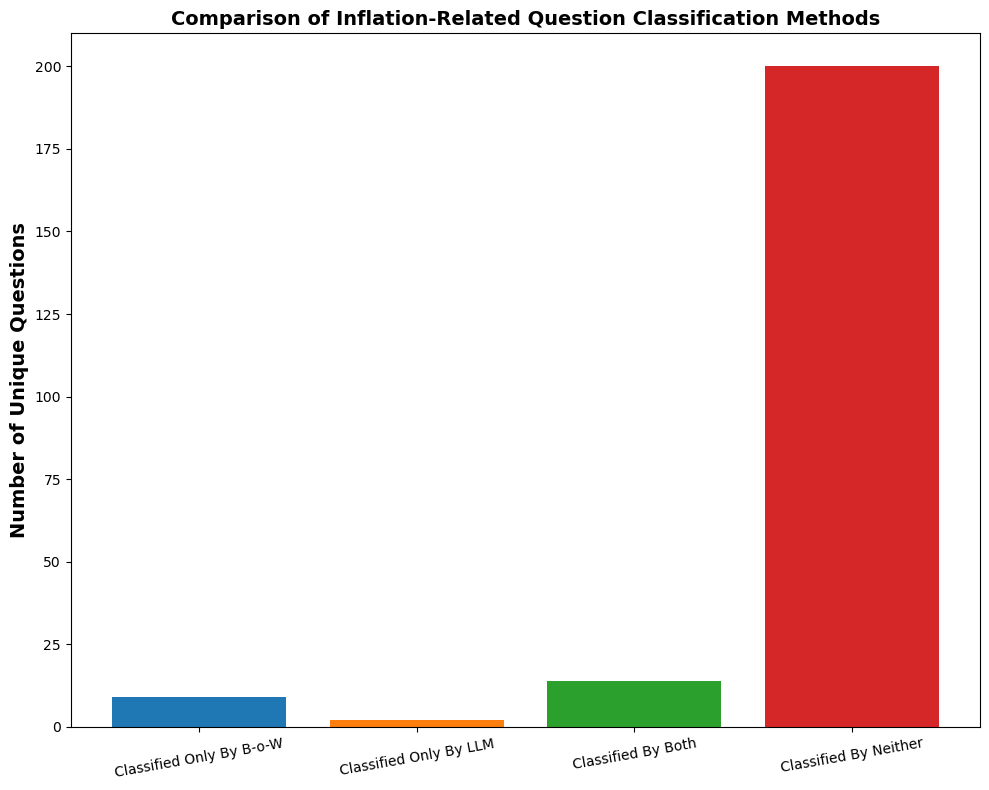

In [78]:
import matplotlib.pyplot as plt

def plot_classification_normal(categories, counts, title='Comparison of Questions', ylabel='Number of Questions'):
    """
    Plots a normal bar chart (no broken axis) with different colors for each bar.
    """

    fig, ax = plt.subplots(figsize=(10, 8))

    # Set colors manually for each bar
    bar_colors = ['C0', 'C1', 'C2', 'C3']

    ax.bar(categories, counts, color=bar_colors)

    # Titles and labels
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')

    # Rotate x-axis labels
    plt.xticks(rotation=10)

    plt.tight_layout()

    plt.show()

    
categories = ['Classified Only By B-o-W', 'Classified Only By LLM', 'Classified By Both', 'Classified By Neither']
counts = [9, 2, 14, 200]

plot_classification_normal(
    categories, counts,
    title='Comparison of Inflation-Related Question Classification Methods',
    ylabel='Number of Unique Questions'
)

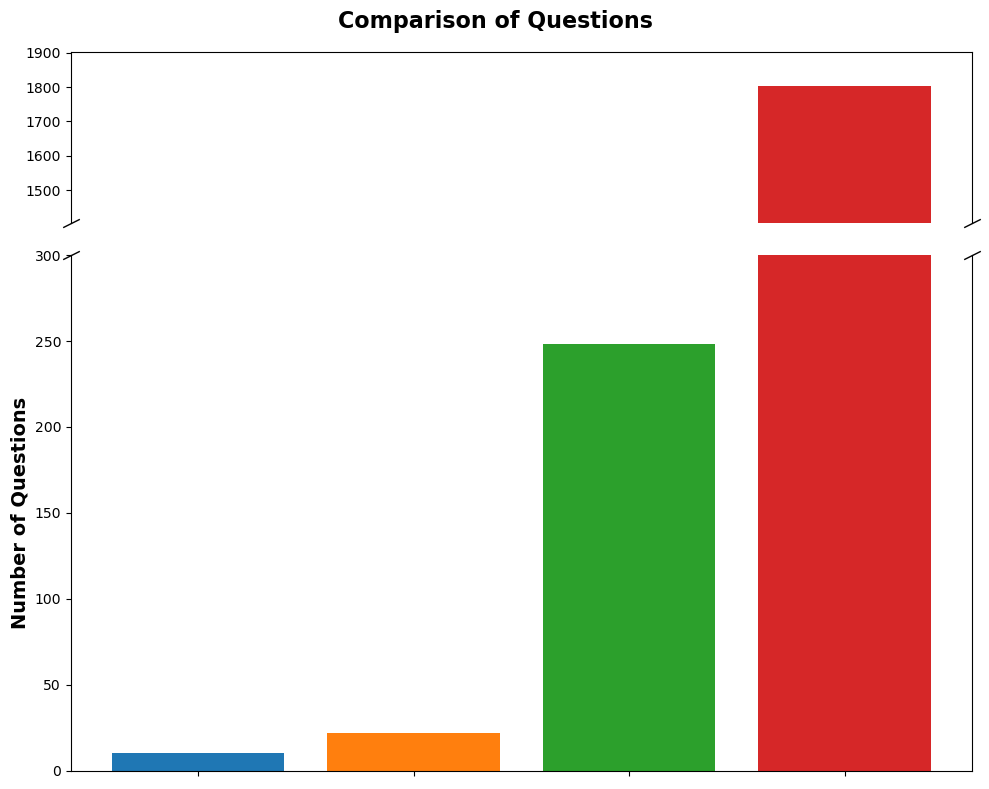

In [59]:
# import matplotlib.pyplot as plt

# categories = ['Classified Only By B-o-W', 'Classified Only By LLM', 'Classified By Both', 'Classified By Neither']
# counts = [total_only_bow, total_only_tariff, total_both, total_neither]

# # Create two subplots with a broken y-axis
# fig, (ax1, ax2) = plt.subplots(
#     2, 1, 
#     sharex=True, 
#     figsize=(10, 8), 
#     gridspec_kw={'height_ratios': [1, 3]}
# )

# # Use default matplotlib colors
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# # Top plot (zoomed out)
# ax1.bar(categories, counts, color=colors)
# ax1.set_ylim(max(counts) - 400, max(counts) + 100)

# # Bottom plot (zoomed in)
# ax2.bar(categories, counts, color=colors)
# ax2.set_ylim(0, 300)

# # Hide spines between plots
# ax1.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)

# # Remove ticks and labels from top plot
# ax1.tick_params(labeltop=False, bottom=False)
# ax1.set_xticklabels([])

# # Bottom plot keeps x-ticks
# ax2.tick_params(labelbottom=True)

# # Add diagonal break lines
# d = .5
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle='none', color='k', mec='k', mew=1, clip_on=False)
# ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
# ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# # Titles and labels
# fig.suptitle('Comparison of Questions', fontsize=16, fontweight='bold')
# ax2.set_ylabel('Number of Questions', fontsize=14, fontweight='bold')

# # Rotate x-axis labels slightly
# plt.xticks(rotation=10)

# # Fit layout nicely
# plt.tight_layout()

# plt.show()


In [34]:
total_questions_bow = df['tariff_questions_bow'].apply(len).sum()
print(total_questions_bow)
# print(df['tariff_questions_bow'].iloc[1])
# print(type(df['tariff_questions_bow'].iloc[0]))

258


In [39]:
total_questions_bow = df['tariff_questions'].apply(len).sum()
print(total_questions_bow)

270


In [26]:
df['tariff_questions'][0]

'["I can picture Darius in the same jet just doing something different on his iPad. So just a question on tax, can you maybe just talk about what the dynamics are around, how if repatriation come through border adjustments, just give us some color on your kind of net export position, if the Brady bill does goes through I\'m sure you guys have done some analysis, what should we expect?", "I guess, my first question, in listening to Darius, it was interesting to hear that there\'s some thought, as things kind of shake out, that you guys could benefit once policies are set. Clearly, you\'re in an export position, but I guess, I’m wondering Dave or Darius, how concerned are you guys about trade wars? Clearly, China\'s been a big growth engine for you. And then also secondly, there\'s been a lot of tweets around defense pricing, having to come down. And so what -- how do you guys feel, your position there as well? Ann then also secondly, there’s been a lot of suites around defense pricing h

In [29]:
def extract_names(text):
    # Define regex patterns for executives and analysts
    executive_section = re.search(r"Executives:(.*?)Analysts:", transcript2, re.DOTALL).group(1)
    analysts_section = re.search(r"Analysts:(.*?)Operator:", transcript2, re.DOTALL).group(1)
    return executive_section, analysts_section

def extract_presentation(transcript):
    # Split the transcript into words to track word positions
    words = transcript.split()
    
    # Find all occurrences of "Operator:"
    operator_positions = [match.start() for match in re.finditer(r"Operator:", transcript)]
    
    # Check if the operator is mentioned after the first 400 words
    if operator_positions and len(" ".join(words[:400])) < operator_positions[0]:
        # Everything before the first mention of "Operator:" is the presentation
        return transcript[:operator_positions[0]]
    
    # If there are fewer than two mentions of "Operator:", return None
    if len(operator_positions) < 2:
        return None  # Not enough mentions of "Operator:"
    
    # Check if the gap between the first and second occurrence is less than 100 words
    first_gap_word_count = len(transcript[operator_positions[0]:operator_positions[1]].split())
    if first_gap_word_count < 100 and len(operator_positions) > 2:
        # Use the gap between the first and third mentions
        return transcript[operator_positions[0]:operator_positions[2]]
    
    # Default case: Use the gap between the first and second mentions
    return transcript[operator_positions[0]:operator_positions[1]]


def extract_q_and_a(transcript):
    # Find all occurrences of "Operator:"
    operator_positions = [match.start() for match in re.finditer(r"Operator:", transcript)]

    # Ensure there are at least two occurrences
    if len(operator_positions) < 2:
        return None  # Not enough mentions of "Operator:"

    # Extract everything after the second occurrence
    text_after_second_operator = transcript[operator_positions[1]:]
    return text_after_second_operator  


def remove_operator_lines(transcript):
    """
    Removes all lines that start with 'Operator:' 
    (assuming each Operator statement is on a single line).
    """
    # ^Operator:   => line begins with 'Operator:'
    # .*          => then remove everything else on that line
    # (?:\n|$)    => include the line break or the end of string
    cleaned_transcript = re.sub(r"^Operator:.*(?:\n|$)", "", transcript, flags=re.MULTILINE)
    return cleaned_transcript  

def create_qna_pairs(transcript, executives, analysts):
    """
    Returns a list of dictionaries:
      [
        {
          "question": "analyst question text here",
          "answer": "all combined executive responses until next question"
        },
        ...
      ]
    Ignores 'Operator:' lines if you run remove_operator_lines() on the transcript first.
    """
    # Split the transcript by speaker
    sections = re.split(r"(?<!\w)([A-Z][a-zA-Z\s.']+):", transcript)

    qna_list = []
    current_question = None
    current_answers = []    

    if len(sections) < 3:
        return qna_list  # No valid speaker-dialogue chunks

    # Walk through the transcript in speaker-dialogue pairs
    for i in range(1, len(sections) - 1, 2):
        speaker = sections[i].strip()
        dialogue = sections[i+1].strip()

        # Check if the speaker is an analyst => new question
        if any(token in analysts for token in speaker.split()):
            # If there's an existing question, finalize its Q&A pair
            if current_question is not None:
                # Join all answer snippets into one
                qna_list.append({
                    "question": current_question,
                    "answer": " ".join(current_answers)
                })
            
            # Start a new question
            current_question = dialogue
            current_answers = []
        
        # If the speaker is an executive => part of the answer
        elif any(token in executives for token in speaker.split()):
            if current_question is not None:
                current_answers.append(dialogue)
            else:
                # There's an executive speaking before any question - optional handling
                pass  
        else:
            # Speaker is neither analyst nor executive (maybe Operator or something else).
            # Typically we ignore them unless you want to handle them specially.
            pass

    # After the loop, if there's a question in progress, finalize it
    if current_question is not None:
        qna_list.append({
            "question": current_question,
            "answer": " ".join(current_answers)
        })

    return qna_list  



def process_transcript(transcript2):
    executives, analysts = extract_names(transcript2)
    
    # Check if there are no analysts
    if not analysts:
        # If no analysts, set Q&A to None and presentation to the entire transcript
        q_and_a = None
        presentation = transcript2
        q_and_a_results = None
        return q_and_a_results, q_and_a, presentation
    
    # Extract presentation and Q&A if analysts exist
    presentation = extract_presentation(transcript2)
    q_and_a = extract_q_and_a(transcript2)
    
    # Handle cases where Q&A is None
    if q_and_a is None:
        cleaned_q_and_a = ""
    else:
        cleaned_q_and_a = remove_operator_lines(q_and_a)
    
    # Create Q&A pairs
    q_and_a_results = create_qna_pairs(cleaned_q_and_a, executives, analysts)
    
    return q_and_a_results, q_and_a, presentation   



In [36]:

# Load your DataFrame
path = "/Users/marcosmaldacena/Downloads/Thesis Data/2014_earnings_call_transcripts.csv"
path = "/scratch/network/mm4846/Thesis Data/transcripts_2006_2025.csv"


def separate(path):

    df = pd.read_csv(path)  # Adjust the filename/path as needed


    # Add an empty column for presentations
    df['presentations'] = None
    df['Q&A'] = None

    # Process each row
    for i in range(len(df)):
        try:
            # Process the content and assign the result to the 'presentations' column
            q_and_a = process_transcript(df.loc[i, 'content'])[1]  
            pres = process_transcript(df.loc[i, 'content'])[2]    
            df.loc[i, 'Q&A'] = q_and_a          
            df.loc[i, 'presentations'] = pres      
        except Exception as e:         
            # Handle the error (log it, skip the row, etc.)
            print(f"Error processing row {i}: {e}")    
        finally:
            # Print progress
            print(f"Processed row {i}")
    return df 


# df = separate(path)

In [37]:
def find_presentation_range(content, subset):
    if not isinstance(content, str) or not isinstance(subset, str):
        return (None, None)  # Handle invalid inputs
    
    content_words = content.split()  # Split content into words
    subset_words = subset.split()  # Split the subset into words
    
    try:
        # Locate the start index in `content_words`
        for i in range(len(content_words) - len(subset_words) + 1):
            if content_words[i:i + len(subset_words)] == subset_words:
                start_index = i
                end_index = i + len(subset_words) - 1
                return (start_index + 1, end_index + 1)  # Return as 1-based indices
        return (None, None)  # If not found
    except Exception as e:
        print(f"Error: {e}")
        return (None, None)

    
def add_data(df):
# Apply the function to calculate the word range for 'presentations'
    df['word_range_pres'] = df.apply(
        lambda row: find_presentation_range(row['content'], row['presentations']),
        axis=1
    )

    # Apply the function to calculate the word range for 'Q&A'
    df['word_range_q_and_a'] = df.apply(
        lambda row: find_presentation_range(row['content'], row['Q&A']),
        axis=1
    )
    df['word_count_pres'] = df['presentations'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df['word_count_q_and_a'] = df['Q&A'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

    return df

df = add_data(df)
# Display the DataFrame
print(df[['presentations', 'word_count_pres', 'word_count_q_and_a', 'word_range_pres', 'word_range_q_and_a']].head())

 

  

In [34]:
# df['word_range_pres']

(df[df['word_count_q_and_a'] <= 200]) 

,ticker,year,quarter,date,content,presentations,Q&A,word_range_pres,word_range_q_and_a,word_count_pres,word_count_q_and_a
4,ERIE,2014,1,2014-05-02 16:58:07,Executives: Scott Beilharz – VP-Capital Manag...,Operator: Good morning and welcome to the Erie...,Operator: Thank you. [Operator Instructions]\n...,"(30, 1698)","(1699, 1882)",1669,184
6,ERIE,2014,3,2014-10-31 12:50:18,"Executives: Scott Beilharz - VP, Capital Manag...",Operator: Good morning and welcome to the Eri...,Operator: Thank you. (Operator Instructions) ...,"(30, 1444)","(1445, 1592)",1415,148
489,CHD,2014,4,2015-02-04 03:25:04,Executives: Jim Craigie - Chairman and CEO Mat...,"Operator: Good afternoon, ladies and gentlemen...",Operator: Ladies and gentlemen thank you parti...,"(23, 17234)","(17235, 17258)",17212,24
604,ABBV,2014,2,2014-07-25 11:57:08,"Executives: Larry Peepo – VP, IR Richard Gonz...",Operator: Good morning and thank you for stand...,Operator: Thank you. And this does conclude to...,"(19, 2500)","(2501, 2523)",2482,23
699,NFLX,2014,1,2014-04-21 20:33:03,Executives: David Wells - Chief Financial Offi...,None,None,"(None, None)","(None, None)",0,0
700,NFLX,2014,2,2014-07-21 22:10:04,Executives: David Wells - CFO Reed Hastings - ...,None,None,"(None, None)","(None, None)",0,0
701,NFLX,2014,3,2014-10-15 23:16:11,Executives: David Wells – Chief Financial Off...,None,None,"(None, None)","(None, None)",0,0
702,NFLX,2014,4,2015-01-20 20:23:07,Executives: David Wells - CFO Reed Hastings - ...,None,None,"(None, None)","(None, None)",0,0
747,ES,2014,1,2014-05-02 15:28:06,Executives: Jeffrey R. Kotkin – Vice Presiden...,Operator: Welcome to the Northeast Utilities E...,Operator: Thank you. And thank you ladies and...,"(118, 8745)","(8746, 8766)",8628,21
883,CHRW,2014,1,2014-04-30 14:15:03,Executives: Tim Gagnon - Director of Investor ...,None,None,"(None, None)","(None, None)",0,0


In [35]:

# Optionally save the updated DataFrame to a new CSV
df.to_csv("/Users/marcosmaldacena/Downloads/Thesis Data/2014_transcripts_with_additional_cols.csv", index=False)

print("New columns added and CSV saved.")





New columns added and CSV saved.


In [18]:
path = "/Users/marcosmaldacena/Downloads/Thesis Data/transcripts_with_additional_cols.csv"

df2 = pd.read_csv(path)

In [19]:
print(df2)

     ticker  year  quarter                 date  \
0      DELL  2014        1  2014-04-23 14:21:06   
1      DELL  2014        2  2014-07-23 15:32:03   
2      DELL  2014        3  2014-10-22 15:06:03   
3      DELL  2014        4  2015-01-30 16:24:09   
4      ERIE  2014        1  2014-05-02 16:58:07   
...     ...   ...      ...                  ...   
1825    XEL  2014        4  2015-01-30 05:28:07   
1826    XOM  2014        1  2014-05-01 17:43:11   
1827    XOM  2014        2  2014-07-31 16:01:02   
1828    XOM  2014        3  2014-10-31 17:59:07   
1829    XOM  2014        4  2015-02-02 14:41:04   

                                                content  \
0     Executives: Anthony T. Takazawa – Vice Preside...   
1     Executives: Tony Takazawa - Vice President, Gl...   
2     Executives: Tony Takazawa - VP, Global IR Joe ...   
3     Executives: Tony Takazawa - VP, Global IR Joe ...   
4     Executives:  Scott Beilharz – VP-Capital Manag...   
...                              

In [5]:

q_and_a_results, _ = process_transcript(transcript2)


for i, item in enumerate(q_and_a_results, start=1):
    print(f"Q{i}: {item['question']}")
    print(f"A{i}: {item['answer']}")
    print()

# process_transcript(transcript2)

Q1: Thanks so much. Good afternoon, guys and let me start by saying Brian, you will very much be missed, but Allison congratulations, I’m not sure if you’re there, but looking forward to working with you more closely and also welcome aboard Pat, looking forward to getting to know you better. Maybe I start with sort of how was your first 50 days has been, any thing surprising? What’s your initial read of the company and the potential long-term growth trajectory here?
A1: Well, as I – when I joined the company back in September, I was working excited about the technology and the opportunity that this product can make a better mix in the lives of patients that use it. And I guess what I’ve learned over the last 50 years that it is more exciting than when I joined. I’m very existed about the product, the technology and really focus on market adoption of this technology for anyone with Type 1 diabetes. This organization is tremendously focused on capitalizing on this opportunity and I’m ver

In [112]:
# def process_single_transcript(transcript):
#     """
#     Given a full transcript text:
#       1) Extract the strings of executives and analysts.
#       2) Extract presentation text (first -> second 'Operator:' gap).
#       3) Extract Q&A text (everything after second 'Operator:').
#       4) Remove 'Operator:' lines from Q&A text.
#       5) Create Q&A pairs.
#       6) Gather some metadata.

#     Returns a dictionary of results.
#     """
#     # 1) Get execs/analysts from the transcript
#     #    (Careful: might raise AttributeError if "Executives:" or "Analysts:" not found)
#     executives, analysts = extract_names(transcript)
    
#     # 2) Presentation text
#     presentation_text = extract_presentation(transcript)
#     if presentation_text is None:
#         presentation_text = ""  # or some default fallback

#     # 3) Q&A text
#     qa_text = extract_q_and_a(transcript)
#     if qa_text is None:
#         qa_text = ""  # or fallback

#     # 4) Remove operator lines from the Q&A portion
#     qa_clean = remove_operator_lines(qa_text)

#     # 5) Create question-answer pairs
#     #    'executives' and 'analysts' are strings; 
#     #    the function checks for speaker tokens within them.
#     qna_pairs = create_qna_pairs(qa_clean, executives, analysts)

#     # 6) Build metadata 
#     num_pairs = len(qna_pairs)

#     # We'll track the word count for presentation, 
#     # plus a list of Q & A word counts.
#     presentation_word_count = len(presentation_text.split())

#     # For each Q&A pair, count question words and answer words
#     q_word_counts = [len(pair["question"].split()) for pair in qna_pairs]
#     a_word_counts = [len(pair["answer"].split())   for pair in qna_pairs]

#     # We might also want the total words in Q or A
#     total_question_words = sum(q_word_counts)
#     total_answer_words   = sum(a_word_counts)

#     # Word range for the presentation in the entire doc (roughly):
#     #   We'll do a naive approach: find how many words come before "presentation_text"
#     #   in the entire transcript. This is "best effort" because 
#     #   your "presentation" is specifically the text between the first and second "Operator:".
#     #   We'll assume it occurs in the same order in the transcript.

#     # Let's create a single string for the entire transcript words:
#     full_words = transcript.split()
#     pres_words = presentation_text.split()

#     # If the presentation_text is definitely a substring, we can try to locate it by words.
#     # For simplicity, let's assume it starts at first_operator and ends at second_operator.
#     # So let's estimate the word indexes as:
#     start_idx = len(transcript[:transcript.find(presentation_text)].split())  # words before presentation
#     end_idx = start_idx + len(pres_words) - 1  # inclusive end index

#     return {
#         "num_qna_pairs": num_pairs,
#         "presentation_word_count": presentation_word_count,
#         "question_word_counts": q_word_counts,
#         "answer_word_counts": a_word_counts,
#         "total_question_words": total_question_words,
#         "total_answer_words": total_answer_words,
#         "presentation_word_range": (start_idx, end_idx),
#         "presentation_text": presentation_text,  # if you need the raw text
#         "qna_pairs": qna_pairs                   # if you want them
#     }

In [113]:
process_single_transcript(transcript2)

{'num_qna_pairs': 44,
 'presentation_word_count': 2943,
 'question_word_counts': [81,
  70,
  295,
  8,
  95,
  135,
  92,
  227,
  59,
  7,
  80,
  79,
  212,
  40,
  61,
  41,
  9,
  3,
  11,
  130,
  98,
  41,
  129,
  0,
  48,
  20,
  7,
  6,
  9,
  0,
  129,
  2,
  2,
  7,
  13,
  70,
  13,
  20,
  9,
  92,
  60,
  61,
  0,
  0],
 'answer_word_counts': [123,
  0,
  0,
  0,
  273,
  0,
  0,
  0,
  193,
  5,
  258,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  552,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  192,
  275,
  0,
  462,
  0,
  6,
  190,
  53,
  89,
  0,
  112,
  250,
  126,
  0,
  0],
 'total_question_words': 2571,
 'total_answer_words': 3159,
 'presentation_word_range': (49, 2991),
 'presentation_text': 'Operator: Good day, ladies and gentlemen, and welcome to the Insulet Corporation Q3 2014 |Earnings Conference Call. At this time, all participants are in a listen-only mode. Later, we will conduct a question-and-answer session, and instructions will follow at that time. 

In [68]:
def remove_operator_lines(transcript):
    """
    Removes all lines that start with 'Operator:' 
    (assuming each Operator statement is on a single line).
    """
    # ^Operator:   => line begins with 'Operator:'
    # .*          => then remove everything else on that line
    # (?:\n|$)    => include the line break or the end of string
    cleaned_transcript = re.sub(r"^Operator:.*(?:\n|$)", "", transcript, flags=re.MULTILINE)
    return cleaned_transcript


# remove_operator_lines(after_second_operator)

In [61]:
# def categorize_transcript_without_operator(transcript, executives, analysts):
#     # Remove all sections where the speaker is "Operator:"
# #     transcript_without_operator = re.sub(r"Operator:.*?(?=(\n[A-Z][a-zA-Z\s.']+:)|$)", "", transcript, flags=re.DOTALL)
# #     transcript = remove_operator_lines(transcript)
#     # Create lists to store questions and responses
#     questions = []
#     responses = []  

#     # Split the transcript into individual speaker sections using regex
#     sections = re.split(r"(?<!\w)([A-Z][a-zA-Z\s.']+):", transcript)

#     # Ensure valid splitting
#     if len(sections) < 3:
#         return questions, responses  # Return empty lists if no sections found

#     # Iterate through sections to identify speakers and their dialogues
#     for i in range(1, len(sections) - 1, 2):  # Step by 2 (speakers and dialogues are paired)
#         speaker = sections[i].strip()
#         dialogue = sections[i + 1].strip()

#         # Check if the speaker is in the executives or analysts strings
#         if any(name in executives for name in speaker.split()):
#             responses.append(dialogue)
#         elif any(name in analysts for name in speaker.split()):
#             questions.append(dialogue)

#     return questions, responses


# questions, responses = categorize_transcript_without_operator(after_second_operator, executives, analysts)




# # Print results
# print("Questions:")
# for q in questions:
#     print(f"- {q}")
    


# print("\nResponses:")
# for r in responses:
#     print(f"- {r}")


Questions:
- I guess, my question is a bit more technical in nature, but if I look at the $207 million of total investment income in the third quarter, can you let us know how much of that was from KFN, just trying to get a sense of how that stacks up against the $53 million of net realized investment income from KFN for the quarter. And then, stepping back, how do you see that ratio holding going forward? I think, in the second quarter it was something like 2/3 of
- You guys are probably as sophisticated as any in valuing businesses. And I'm curious as to how you value your business and at what price or point would it make sense for you to take some of that, I guess, it's $11.5 billion of cash investments on your balance sheet, which is about 65% of your market cap, to basically buy back your own shares, if you thought they were misvalued or do you think they misvalued?
- Just 2 things. One is the -- in the Public Markets, the unrealized investment losses, the $46 million that we see,

In [65]:
# def create_qna_pairs(transcript, executives, analysts):
#     """
#     Returns a list of dictionaries:
#       [
#         {
#           "question": "analyst question text here",
#           "answer": "all combined executive responses until next question"
#         },
#         ...
#       ]
#     Ignores 'Operator:' lines if you run remove_operator_lines() on the transcript first.
#     """
#     # Split the transcript by speaker
#     sections = re.split(r"(?<!\w)([A-Z][a-zA-Z\s.']+):", transcript)

#     qna_list = []
#     current_question = None
#     current_answers = []    

#     if len(sections) < 3:
#         return qna_list  # No valid speaker-dialogue chunks

#     # Walk through the transcript in speaker-dialogue pairs
#     for i in range(1, len(sections) - 1, 2):
#         speaker = sections[i].strip()
#         dialogue = sections[i+1].strip()

#         # Check if the speaker is an analyst => new question
#         if any(token in analysts for token in speaker.split()):
#             # If there's an existing question, finalize its Q&A pair
#             if current_question is not None:
#                 # Join all answer snippets into one
#                 qna_list.append({
#                     "question": current_question,
#                     "answer": " ".join(current_answers)
#                 })
            
#             # Start a new question
#             current_question = dialogue
#             current_answers = []
        
#         # If the speaker is an executive => part of the answer
#         elif any(token in executives for token in speaker.split()):
#             if current_question is not None:
#                 current_answers.append(dialogue)
#             else:
#                 # There's an executive speaking before any question - optional handling
#                 pass
#         else:
#             # Speaker is neither analyst nor executive (maybe Operator or something else).
#             # Typically we ignore them unless you want to handle them specially.
#             pass

#     # After the loop, if there's a question in progress, finalize it
#     if current_question is not None:
#         qna_list.append({
#             "question": current_question,
#             "answer": " ".join(current_answers)
#         })

#     return qna_list

# cleaned_transcript = remove_operator_lines(after_second_operator)

# # 2) Build Q&A pairs
# qna_results = create_qna_pairs(cleaned_transcript, executives, analysts)

# # 3) Print them
# for i, item in enumerate(qna_results, start=1):
#     print(f"Q{i}: {item['question']}")
#     print(f"A{i}: {item['answer']}")
#     print()

Q1: I guess, my question is a bit more technical in nature, but if I look at the $207 million of total investment income in the third quarter, can you let us know how much of that was from KFN, just trying to get a sense of how that stacks up against the $53 million of net realized investment income from KFN for the quarter. And then, stepping back, how do you see that ratio holding going forward? I think, in the second quarter it was something like 2/3 of
A1: Hi Michael, this is Bill. Thanks for the question. As it relates to KFN, you are right in that we do provide some realized information and so in the second quarter we showed in the distribution that $36 million came from KFN and in the third quarter that's $53 million, so roughly about $89 million year-to-date. On a run rate basis, that's a realized return of about 9%. When you take into account unrealized returns, which is embedded in that $207 million, KFN right now is performing much better than we had expected. That being sai

In [47]:
# def get_question_response_pairs(transcript, executives, analysts):
#     # Remove all sections where the speaker is "Operator:"
#     transcript_without_operator = re.sub(r"Operator:.*?(?=\n[A-Z][a-zA-Z\s.']+:|$)", "", transcript, flags=re.DOTALL)

#     # Split the cleaned transcript into individual speaker sections using regex
#     sections = re.split(r"\n([A-Z][a-zA-Z\s.']+):", transcript_without_operator)

#     # Ensure valid splitting
#     if len(sections) < 3:
#         return []  # Return an empty list if no valid sections are found

#     # Initialize variables
#     question_response_pairs = []
#     current_question = None
#     current_responses = []

#     # Iterate through sections to identify speakers and their dialogues
#     for i in range(1, len(sections) - 1, 2):  # Step by 2 (speakers and dialogues are paired)
#         speaker = sections[i].strip()
#         dialogue = sections[i + 1].strip()

#         # Check if the speaker is in the analysts list (indicating a question)
#         if any(name in analysts for name in speaker.split()):
#             # If there is a current question, store the pair
#             if current_question:
#                 question_response_pairs.append({"question": current_question, "response": " ".join(current_responses)})
#             # Start a new question
#             current_question = dialogue
#             current_responses = []
#         # Check if the speaker is in the executives list (indicating a response)
#         elif any(name in executives for name in speaker.split()):
#             current_responses.append(dialogue)

#     # Add the last question-response pair (if any)
#     if current_question:
#         question_response_pairs.append({"question": current_question, "response": " ".join(current_responses)})

#     return question_response_pairs



# question_response_pairs = get_question_response_pairs(after_second_operator, executives, analysts)

# print(question_response_pairs)

# # Print results
# for i, pair in enumerate(question_response_pairs, start=1):
#     print(f"Q{i}: {pair['question']}")
#     print(f"A{i}: {pair['response']}\n")

[]


In [36]:
# print(responses)

[]


In [26]:
# analysts_section = re.search(r"Analysts:(.*?)Operator:", transcript2, re.DOTALL).group(1)


# # Extract names from the section
# # names = re.findall(r"[A-Z][a-zA-Z]+\s[A-Z][a-zA-Z]+", analysts_section)

# # Print the result
# print(analysts_section)

 Michael S. Kim - Sandler O'Neill + Partners, L.P., Research Division Leon G. Cooperman - Omega Advisors, Inc. Christoph M. Kotowski - Oppenheimer & Co. Inc., Research Division M. Patrick Davitt - Autonomous Research LLP Marc S. Irizarry - Goldman Sachs Group Inc., Research Division Brian Bedell - Deutsche Bank AG, Research Division Christopher Harris - Wells Fargo Securities, LLC, Research Division Devin P. Ryan - JMP Securities LLC, Research Division Michael Carrier - BofA Merrill Lynch, Research Division

